

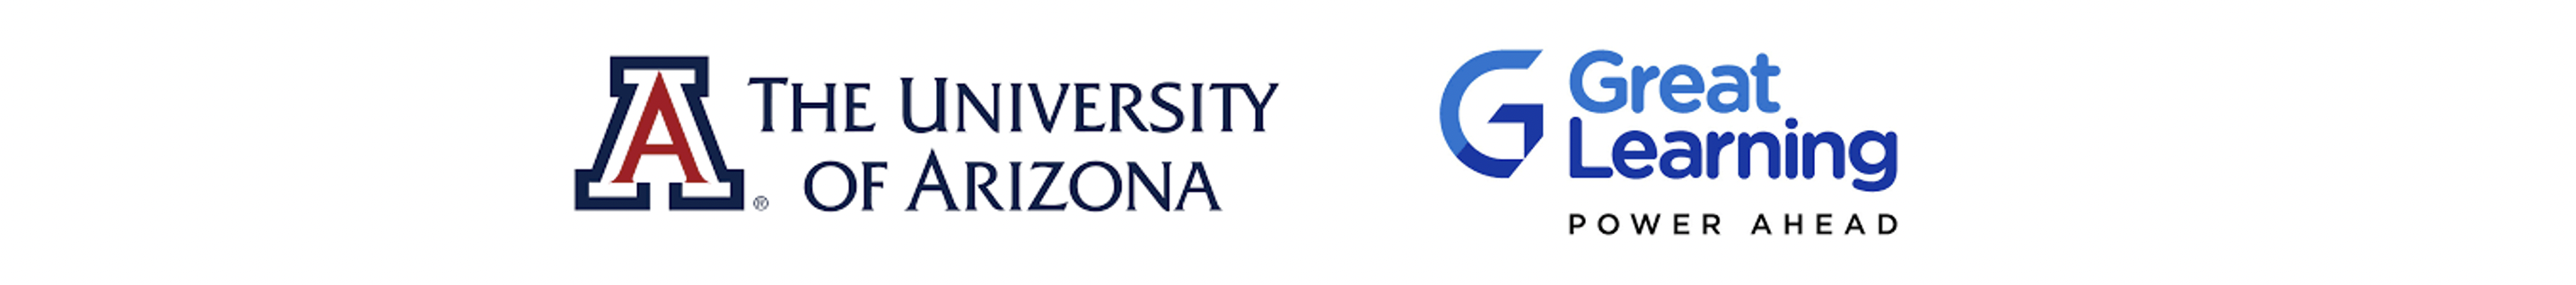

## Pop-Up Quizzes

### 1- Which clustering algorithm is commonly used to refine the initial centroids obtained from the BIRCH algorithm?


a) K-means clustering

b) DBSCAN

c) Agglomerative clustering

d) Mean shift

Answer: a) K-means clustering

### 2- Which of the following points are considered noise in DBSCAN?

a) Points that have a density above a specified threshold

b) Points that have a density below a specified threshold

c) Points that are isolated from other points

d) Points that are in the core of a cluster

Answer: c) Points that are isolated from other points

<h1><u>Clustering and Association Rule Mining</u> - Clustering </h1>







- **Clustering** as we already know is a fundamental unsupervised learning technique in machine learning and data analysis.
- It involves grouping similar data points together based on their intrinsic characteristics or patterns. 
- The goal of clustering is to discover underlying structures or relationships in the data without any prior knowledge or labels.


- Clustering has a wide range of applications in various fields such as : 
    - **customer segmentation**
    - **image and text analysis**
    - **anomaly detection**
    - **recommendation systems** etc..


- Some basic techniques have been covered earlier , this notebook will focus on **advanced clustering techniques** such as:
    - <font color='blue'>**DBSCAN**</font>
    - <font color='blue'>**BIRCH**
    - <font color='blue'>**OPTICS**

<h2>PYTHON CASE STUDY</h2>

<h3>Objective:</h3>

**Using the dataset for each Wine content we are going to segment each wine based upon different features present in our dataset and answer questions in regards**

<h3>About Dataset:</h3>

This dataset contains records related to red and white variants of the Portuguese Vinho Verde wine. It contains information from 1599 red wine samples and 4898 white wine samples. Input variables in the data set consist of the type of wine (either red or white wine) and metrics from objective tests (e.g. acidity levels, PH values, ABV, etc.),. Each expert graded the wine quality between 0 (bad) to 10(very good). Due to privacy and logistic issues, there is no data about grape types, wine brand, and wine selling price.

<h3> EDA: </h3>



In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [50]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [51]:
df.shape

(1599, 11)

In [52]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


<h4>Null Value check</h4>

In [53]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

**there is not any NULL value in the dataset.**

<h4>Dupllicate Rows check</h4>

In [56]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [57]:
df.drop_duplicates(inplace=True)

In [58]:
df.shape

(1359, 11)

we found some duplicate values and dropped those values.

In [59]:
X = df.copy()

In [60]:
X.shape

(1359, 11)

<h4>Correlation check</h4>

<AxesSubplot:>

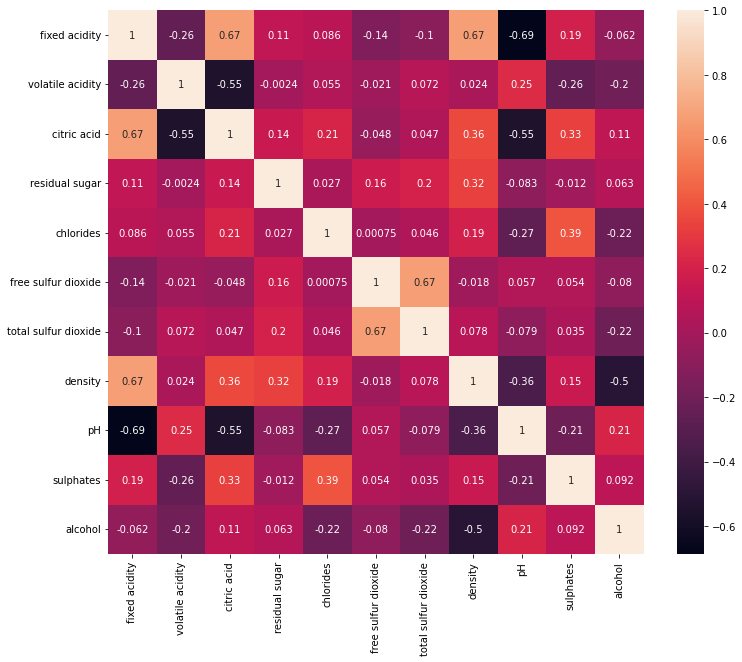

In [61]:
corr = df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr,annot=True)

We can see few features like 
- 'total sulphur dioxide' & 'free sulphur dioxide' are highly corelated
- 'pH' & 'fixed acidity' are highly corelated whereas
- 'free sulphur dioxide' & 'chlorides' are unrelated

<h4>Outlier Check</h4>

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
dtypes: float64(11)
memory usage: 127.4 KB


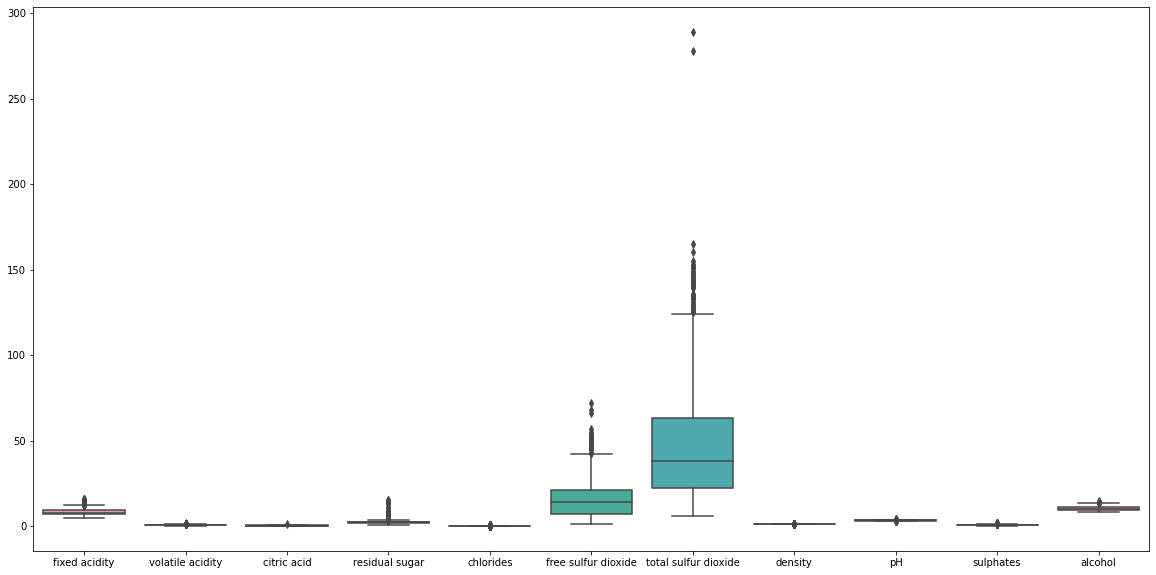

In [63]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.boxplot(data = df)
plt.show()

we can see some outlier in features like :.
- 'fixed acidity'
- 'free sulphur dioxide'
- 'total sulphur dioxide'
- 'residual sugar'

<h3>Scaling the dataset</h3>

- When performing clustering, the distances or similarities between data points are crucial for determining their grouping. 
- If the features have different scales, it can lead to biased or misleading clustering results. 
- Here are a few reasons why scaling is important in clustering:


    - Equalizing Feature Influence
    - Achieving Uniform Variances
    - Handling Different Measurement Units
    - Enhancing Algorithm Performance
    
- There are many approaches that can be used for scaling we are using **Standard Sacler** method here.

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
X_normalized = StandardScaler().fit(X).transform(X)

In [66]:
X_normalized

array([[-0.52443096,  0.93200015, -1.39325797, ...,  1.29187216,
        -0.57856134, -0.95437429],
       [-0.29406274,  1.91580043, -1.39325797, ..., -0.70839548,
         0.12482157, -0.5845748 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.32124691,
        -0.05102416, -0.5845748 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  1.35639693,
         0.59374351,  0.7097234 ],
       [-1.38831178,  0.63139451, -0.77933603, ...,  1.67902074,
         0.3006673 , -0.21477532],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.51757501,
         0.00759108,  0.52482366]])

<h2>BIRCH</h2>

- **Balanced Iterative Reducing and Clustering using Hierarchies**
- BIRCH is a scalable clustering method based on hierarchy clustering.
- It only requires a one-time scan of the dataset making it fast for working with large datasets. 
- This algorithm is based on the CF (clustering features) tree. 
- In addition, this algorithm uses a tree-structured summary to create clusters.

**What is a clustering feature?**
- A Clustering Feature (CF) is a data structure used in the BIRCH  algorithm to represent a subset of data points within a cluster. 
- Each CF serves as a summary or compact representation of the data points it represents.
- A Clustering Feature typically contains the following information:

    - N = Number of items in subclusters 
    - LS =  vector sum of the data points
    - SS = Sum of the squared data points 

Here we can see in the example how a CF generates there. In the image, five samples are available (3,4), (2, 6), (4, 5), (4, 7), (3, 8),.

So by the image N = 5, LS = (16,30) and SS = (54, 190).

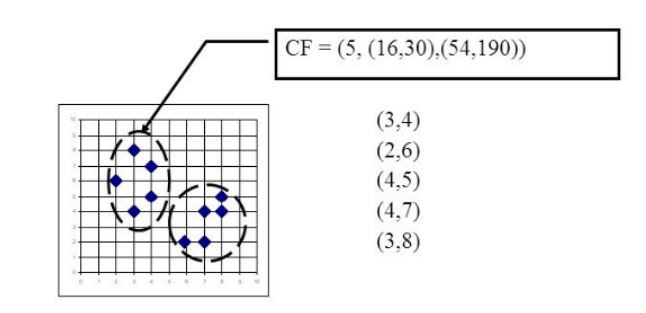

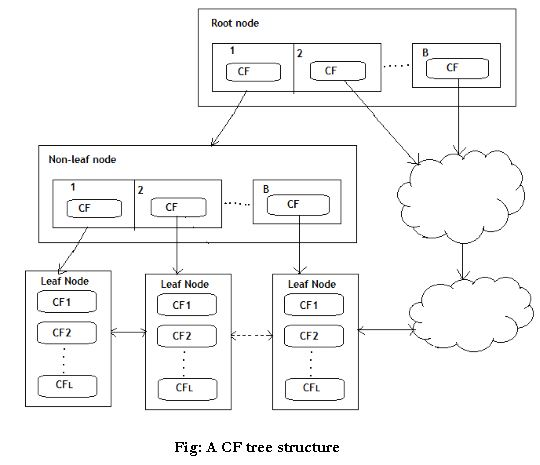

 <h3>Working of BIRCH Algorithm</h3>

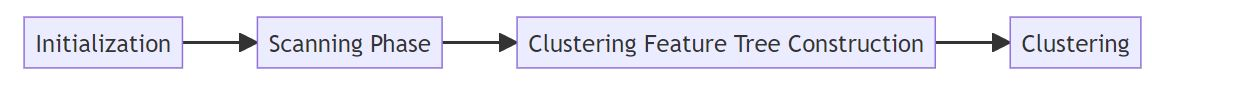


  <ol>
    <li><strong>Initialization:</strong> BIRCH begins by creating an empty CF Tree and specifying the maximum number of CF (Clustering Feature) entries allowed in each node of the tree.</li>
    <li><strong>Scanning Phase:</strong> The algorithm scans the input data points and inserts them into the CF Tree. Each data point is represented as a CF entry containing its attribute values and a counter for the number of points it represents.</li>
    <li><strong>Clustering Feature Tree Construction:</strong> BIRCH incrementally constructs the CF Tree by merging CF entries in a bottom-up manner. It uses a two-step merging process to reduce the height of the tree and ensure balanced clustering.</li>
    <li><strong>Clustering:</strong> Once the CF Tree is constructed, BIRCH performs the clustering step by recursively partitioning the tree. It generates the final clusters by aggregating the CF entries at the leaf nodes of the tree.</li>
  </ol>

In [67]:
from sklearn.cluster import Birch
from sklearn import metrics
# Create a list to store the average silhouette scores for different thresholds
silhouette_scores = []

# Try different values of threshold
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
cluster_range = list(range(3, 11))

for t in thresholds:
    silhouette_scores=[]
    for n_clusters in cluster_range:
    # Create a BIRCH instance with the current branching factor
        birch = Birch(threshold=t, n_clusters=n_clusters)
        birch.fit(X_normalized)
    # Get the predicted cluster labels
        labels = birch.predict(X_normalized)
    # Calculate the average silhouette score
        silhouette_avg = metrics.silhouette_score(X_normalized, labels)
    # Append the average silhouette score to the list
        silhouette_scores.append(silhouette_avg)
        print((t,n_clusters),"--->",silhouette_avg)
    print("For Threshold value: ",t,"max silhouette score achieved is: ", max(silhouette_scores),"\n")

(0.1, 3) ---> 0.14674365421876365
(0.1, 4) ---> 0.1551290217233332
(0.1, 5) ---> 0.14777414638228906
(0.1, 6) ---> 0.15598436981191005
(0.1, 7) ---> 0.14552983222284951
(0.1, 8) ---> 0.14665387560794932
(0.1, 9) ---> 0.13146817580908404
(0.1, 10) ---> 0.1276261816693251
For Threshold value:  0.1 max silhouette score achieved is:  0.15598436981191005 

(0.2, 3) ---> 0.16411021853830077
(0.2, 4) ---> 0.145584148569465
(0.2, 5) ---> 0.1596822021263264
(0.2, 6) ---> 0.15750908134450153
(0.2, 7) ---> 0.16436594276164831
(0.2, 8) ---> 0.15450580950497317
(0.2, 9) ---> 0.14009985852964235
(0.2, 10) ---> 0.1402629247771162
For Threshold value:  0.2 max silhouette score achieved is:  0.16436594276164831 

(0.3, 3) ---> 0.14728880537769412
(0.3, 4) ---> 0.13409525891839372
(0.3, 5) ---> 0.14813681343867788
(0.3, 6) ---> 0.14209920777682333
(0.3, 7) ---> 0.14949878347443218
(0.3, 8) ---> 0.1342798068194781
(0.3, 9) ---> 0.14364655305142995
(0.3, 10) ---> 0.13000590519177116
For Threshold value:  

**The Threshold value can take any value between (0.8) and the number of clusters should be = 4**

In [68]:
from sklearn.cluster import Birch
# Using the best threshold value as 0.8 and n_clusters=4
model = Birch(threshold=0.8, n_clusters=4)
model.fit(X_normalized)
yhat = model.predict(X_normalized)
clusters = np.unique(yhat)

In [69]:
np.unique(yhat)

array([0, 1, 2, 3])

In [70]:
X["quality_clusters_BIRCH"]=yhat

In [23]:
X.columns,df.columns

(Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'quality_clusters_BIRCH'],
       dtype='object'),
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol'],
       dtype='object'))

In [71]:
X.quality_clusters_BIRCH.value_counts()

1    575
0    391
2    361
3     32
Name: quality_clusters_BIRCH, dtype: int64

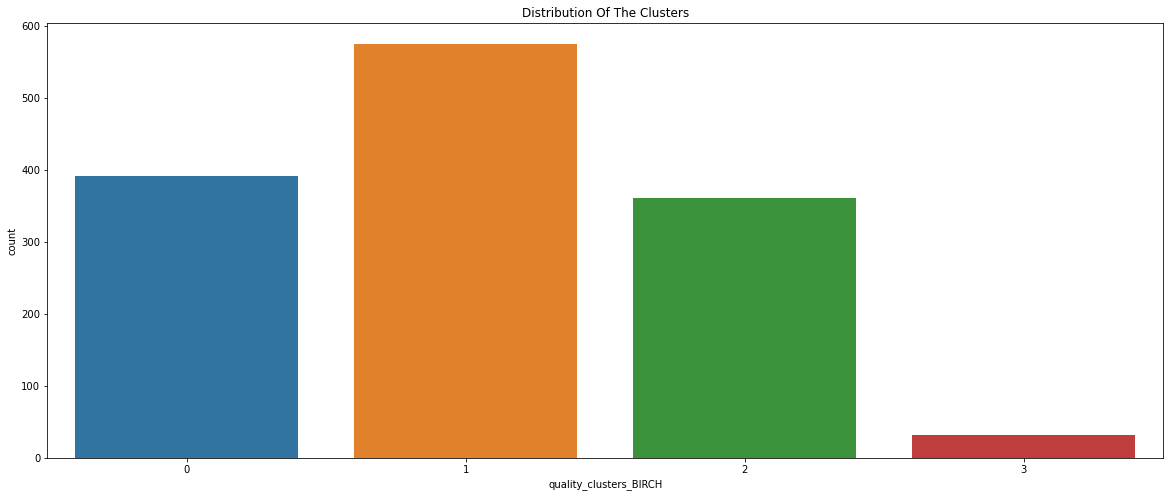

In [24]:
#Plotting countplot of clusters
plt.figure(figsize=(20,8))
pl = sns.countplot(x=X["quality_clusters_BIRCH"])
pl.set_title("Distribution Of The Clusters")
plt.show()

**The most Wines fall under the cluster labelled as "1" and least wines fall under the cluster labelled as "3"**

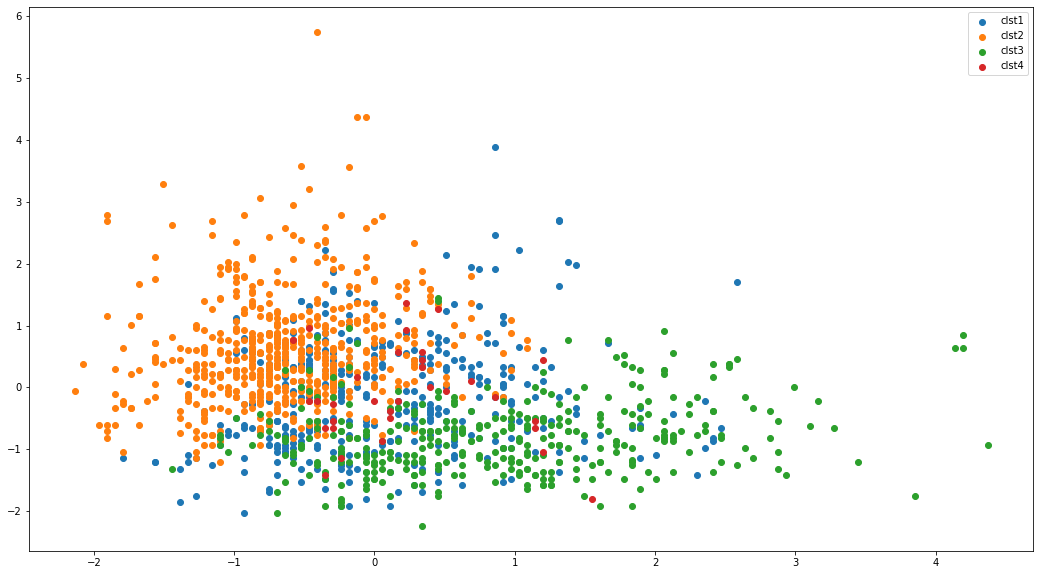

In [25]:
plt.figure(figsize=(18,10))
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X_normalized[row_ix, 0], X_normalized[row_ix, 1])
    plt.legend(["clst1","clst2","clst3","clst4"],loc='upper right')

plt.show()

**The 4 clusters are represnted here for the data not a very clear seperation of clusters is visible but still we can see atleast 2 distinct clusters getting formed in the data**

In [72]:
# Evaluating BIRCH using the silhouette score
from sklearn import metrics

silhouette_score = metrics.silhouette_score(X_normalized, yhat)
print("Silhouette Score:", silhouette_score)

Silhouette Score: 0.179383859533109


In [73]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_clusters_BIRCH
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1


In [74]:
X.quality_clusters_BIRCH.value_counts()

1    575
0    391
2    361
3     32
Name: quality_clusters_BIRCH, dtype: int64

<H2>DBSCAN</H2>



- **Density-Based Spatial Clustering of Applications with Noise** 
- It is a density-based clustering algorithm widely used for grouping data points based on their proximity and density.
- It is capable of discovering clusters of arbitrary shapes without prior knowledge of the number of clusters.



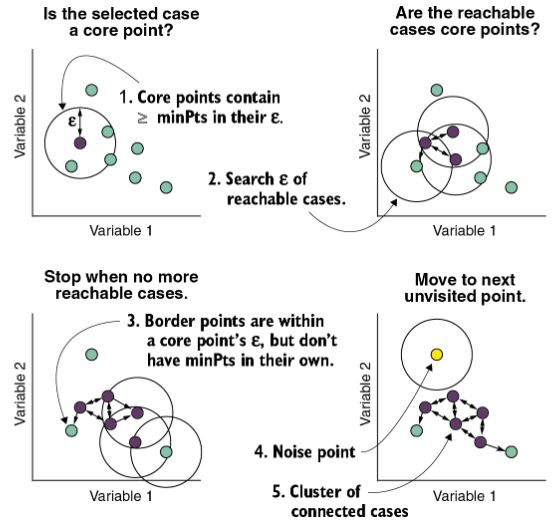

**How DBSCAN works ?**

Here's a high-level explanation of how DBSCAN works:

 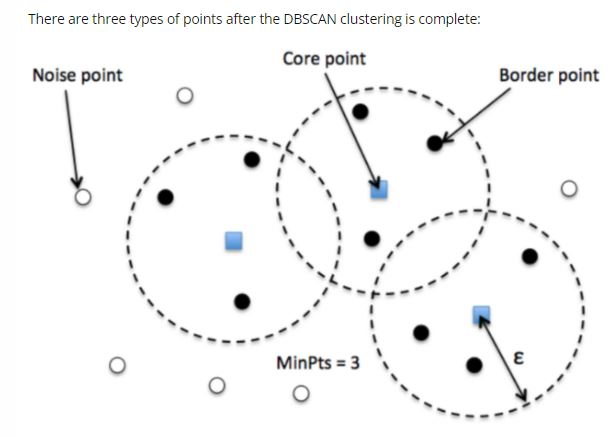

1. **Parameter Setup:**

    - **Epsilon (ε)**: A distance threshold that defines the neighborhood of a data point.
    - **MinPts**: The minimum number of data points required to form a dense region.
    
    

2. **<u>Core Point</u> Identification:**

    - For each data point in the dataset, DBSCAN measures the distance between that point and all other data points.
    - If the distance is less than or equal to ε, the data point is considered a neighbor of the other point.
    - If the number of neighbors is greater than or equal to MinPts, the data point is classified as a core point.
    - Core points are characterized by having a sufficient number of neighboring points within ε.



3. **Density-Reachable and Density-Connected:**

    - DBSCAN defines two important terms to establish connectivity between data points: 
        - **density-reachable** : A data point A is density-reachable from a data point B if there exists a chain of core points from B to A, where each consecutive point is a neighbor of the previous point.
 
        - **density-connected** : A data point A is density-connected to a data point B if there exists a core point C that is reachable from both A and B.


4. **Cluster Formation:**

    - DBSCAN starts by selecting an unvisited data point.
    - If the point is a core point, a new cluster is created.
    - The algorithm identifies all density-reachable points from the core point and adds them to the cluster.
    - The process continues recursively, expanding the cluster until no more density-reachable points are found.
    - If a non-core point is encountered, it is labeled as a **<u>border point</u>** but is not used to expand the cluster.
    - The algorithm repeats the process with unvisited data points until all points have been visited.


5. **<u>Noise Points</u>:**

    - Points that are neither core points nor border points are considered noise points or outliers.
    - Noise points do not belong to any cluster and are typically discarded or considered as separate entities.
    



In [75]:
from sklearn.cluster import DBSCAN

In [76]:
model = DBSCAN(eps=0.5, min_samples=5) # default value
yhat = model.fit_predict(X_normalized)
clusters = np.unique(yhat)

In [77]:
clusters
# 2 clusters we can get from the same.

array([-1,  0])

In [78]:
X["quality_clusters_DBSCAN"]=yhat

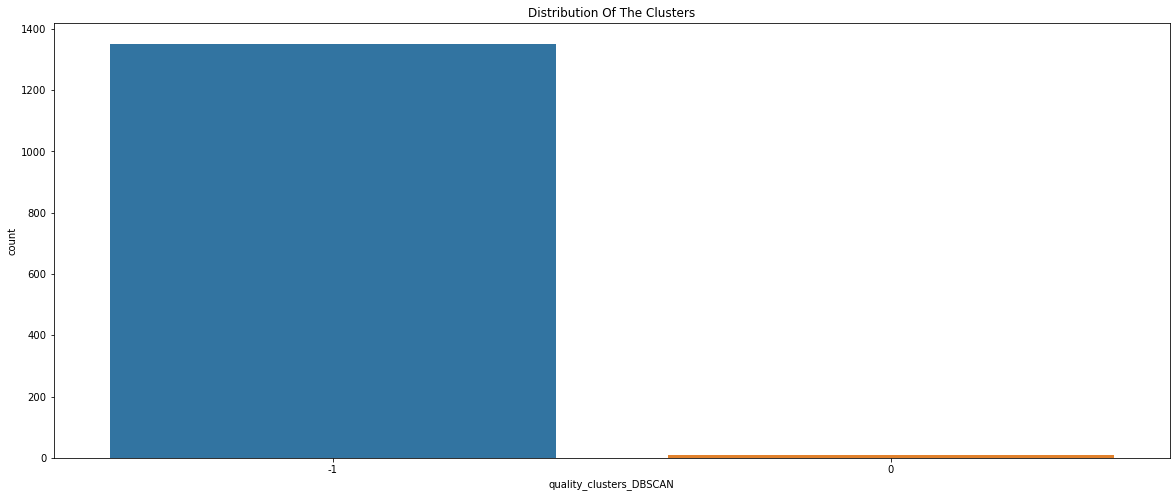

In [79]:
#Plotting countplot of clusters
plt.figure(figsize=(20,8))
pl = sns.countplot(x=X["quality_clusters_DBSCAN"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [80]:
X["quality_clusters_DBSCAN"].value_counts()

-1    1351
 0       8
Name: quality_clusters_DBSCAN, dtype: int64

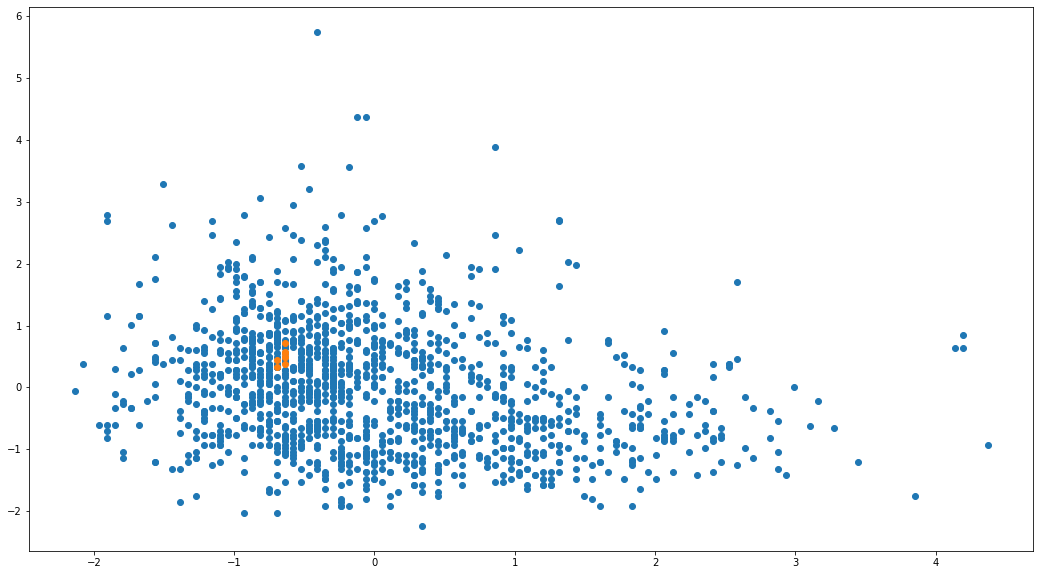

In [81]:
plt.figure(figsize=(18,10))

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X_normalized[row_ix, 0], X_normalized[row_ix,1])

plt.show()

**we can see that one cluster is over dominating on others, so we can't use this algorithm for the dataset.**

In [82]:
# Evaluating DBSCAN  using the silhouette score
from sklearn import metrics

silhouette_score = metrics.silhouette_score(X_normalized, yhat)
print("Silhouette Score:", silhouette_score)

Silhouette Score: -0.11598926996607302


<h2> OPTICS </h2>

- OPTICS (Ordering Points To Identify the Clustering Structure) is an unsupervised density-based clustering algorithm that extends the capabilities of DBSCAN. 
-  OPTICS does not require the specification of a fixed neighborhood size parameter like DBSCAN, making it suitable for datasets with varying densities.
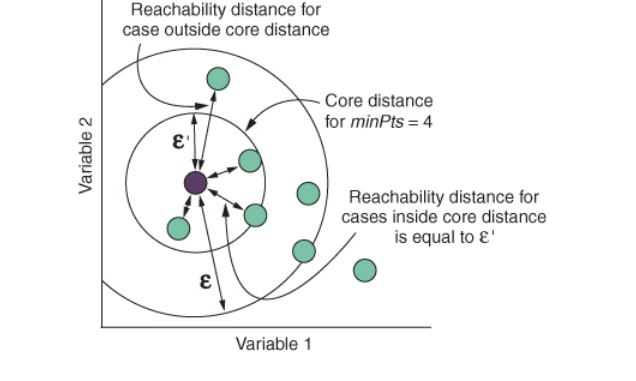




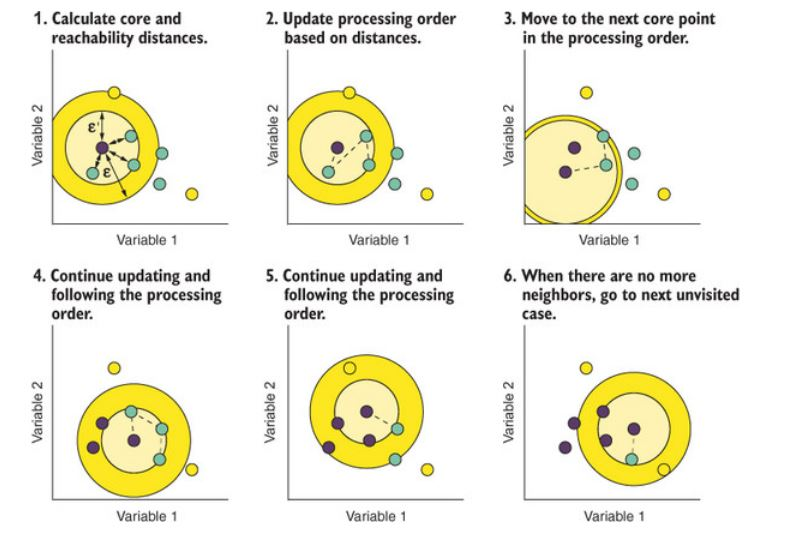

- Here's a high-level overview of how the OPTICS algorithm works:

    1. **Reachability Distance Calculation**: 
        - For each data point in the dataset, OPTICS computes its reachability distance to other data points. The reachability distance measures the distance at which a data point can be reached from another point while considering the local density around both points. It takes into account both the distance between the points and the density of the points within a defined neighborhood.

    2. **Core Distance Calculation:**
        - The core distance represents the minimum distance at which a data point is considered a core point. A core point is defined as a point with a sufficient number of neighboring points within a specified radius.

    3. **Building the OPTICS Reachability Plot:**
        - OPTICS constructs a reachability plot by ordering the data points based on their reachability distances. The reachability plot provides a hierarchical ordering of the points, capturing both the density-based clustering structure and the varying densities within the dataset.

    4. **Extracting Clusters:**
        - Clusters can be extracted from the reachability plot by applying a threshold called the "epsilon" value. The epsilon value determines the maximum reachability distance for points to be considered part of the same cluster. By traversing the reachability plot, clusters can be identified as connected regions of points that satisfy the epsilon threshold.
        
    5. **Identifying Noise Points:**
        - Points that do not meet the epsilon threshold are considered noise points or outliers. They do not belong to any cluster and are typically discarded or treated separately.

In [83]:
from sklearn.cluster import OPTICS

In [84]:
model = OPTICS(eps=None, min_samples=5)#default value
yhat = model.fit_predict(X_normalized)
clusters = np.unique(yhat)

In [85]:
X['quality_clusters_OPTICS']=yhat

In [87]:
clusters
# 15 clusters are obtained from this method

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

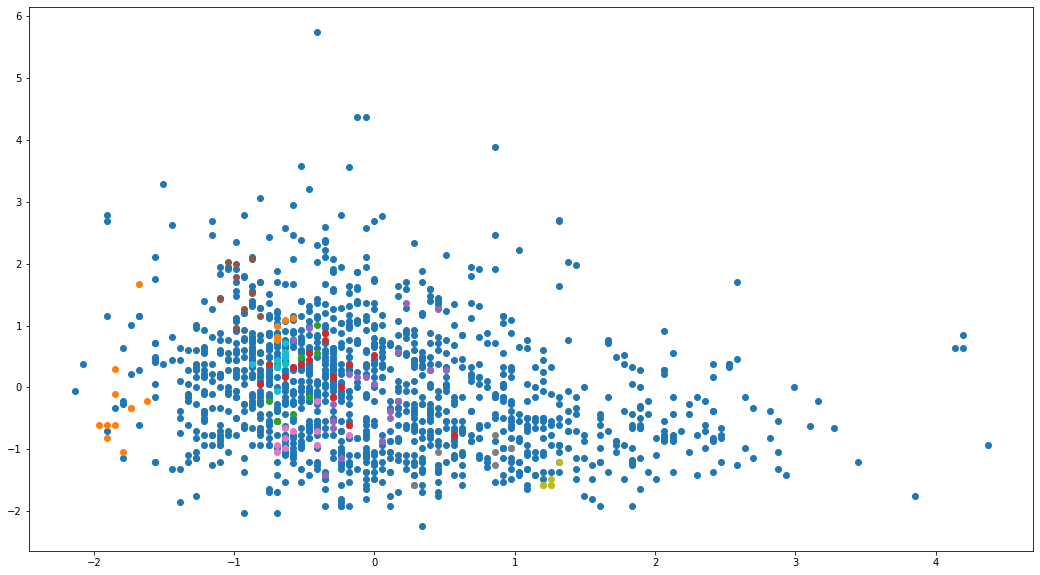

In [88]:
plt.figure(figsize=(18,10))
for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    plt.scatter(X_normalized[row_ix, 0], X_normalized[row_ix, 1])
    #plt.legend(candi,loc='upper right')

plt.show()

**Total of 15 clusters are present in the data and one cluster "coloured in blue" clearly dominates all others making this method as well not very fit for clustering and a further hyperparametr tuning will be required .**

In [89]:
# Evaluating OPTICS using the silhouette score
from sklearn import metrics

silhouette_score = metrics.silhouette_score(X_normalized, yhat)
print("Silhouette Score:", silhouette_score)

Silhouette Score: -0.3416348581138198


## Inference:

- silhouette score (BIRCH) **0.18**  >  silhouette score (DBSCAN) **-0.12**  >  silhouette score(OPTICS) **-0.34**


- therefore BIRCH works the best for this data as silhouette score ~ 1


In [42]:
X.head()#

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_clusters_BIRCH,quality_clusters_DBSCAN,quality_clusters_OPTICS
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1,-1,-1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1,-1,-1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1,-1,-1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2,-1,-1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1,-1,-1


#### **Let us gain some additional insights for the clusters identified by BIRCH algorithm**

In [43]:
X.quality_clusters_BIRCH.value_counts()

1    575
0    391
2    361
3     32
Name: quality_clusters_BIRCH, dtype: int64

### The winery wants to know answers to the following questions:
    



### 1) What is the median 'total sulphur dioxide' levels for the three clusters?


In [44]:
X.groupby('quality_clusters_BIRCH')['total sulfur dioxide'].median()

quality_clusters_BIRCH
0    75.0
1    32.0
2    22.0
3    45.0
Name: total sulfur dioxide, dtype: float64

##### 2) What is the maximum and minimum density value in the 3 clusters?

In [46]:
X.groupby('quality_clusters_BIRCH')['density'].max()

quality_clusters_BIRCH
0    1.00369
1    1.00025
2    1.00320
3    0.99960
Name: density, dtype: float64

In [47]:
X.groupby('quality_clusters_BIRCH')['density'].min()

quality_clusters_BIRCH
0    0.99007
1    0.99020
2    0.99150
3    0.99623
Name: density, dtype: float64

##### 3) Which is the cluster having the highest average chloride level?

<AxesSubplot:xlabel='quality_clusters_BIRCH'>

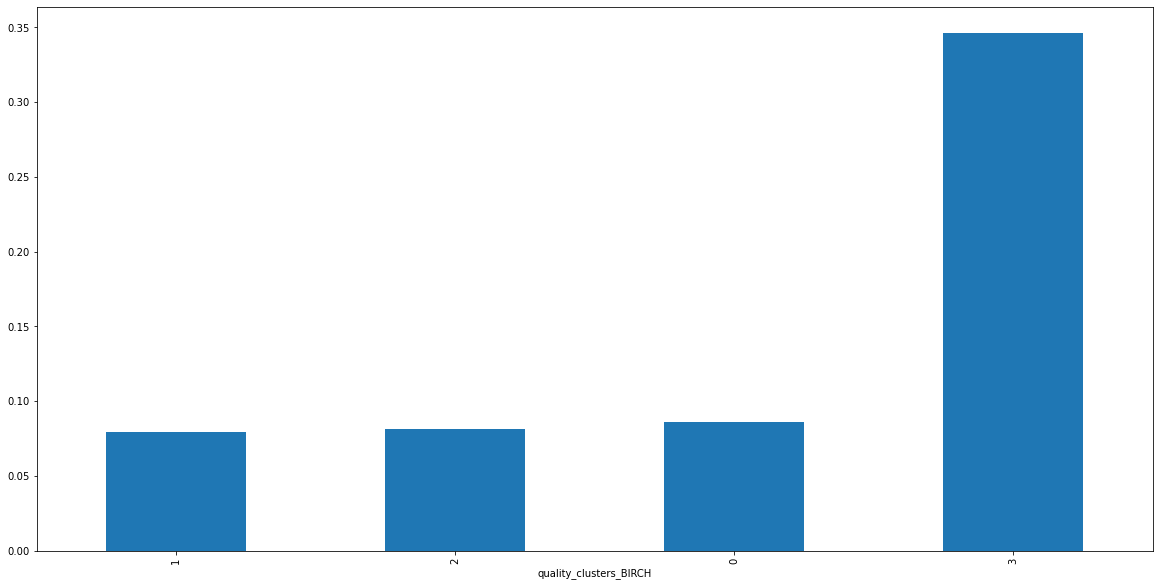

In [59]:
X.groupby('quality_clusters_BIRCH')['chlorides'].mean().sort_values().plot(kind='bar')

4) What is the average fixed acidity level for all the clusters ?


In [60]:
X.groupby('quality_clusters_BIRCH')['fixed acidity'].mean()

quality_clusters_BIRCH
0    8.431969
1    7.224870
2    9.873130
3    8.709375
Name: fixed acidity, dtype: float64